# MRI Convolutional Neural Network Testing

## Installation and Initial Setup

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os

boo


In [2]:
tumor_train = '../cnn-gan-data/train-images/yes-tumor/real-images'
no_tumor_train = '../cnn-gan-data/train-images/no-tumor/real-images'
tumor_test = '../cnn-gan-data/test-images/yes-tumor'
no_tumor_test = '../cnn-gan-data/test-images/no-tumor'
images = []
labels = []

test_images = []
test_labels = []

In [3]:
# ganMode accepts None ,DC, W, or Unrolled as values
ganMode = 'DC'
# genEpochs accepts 5, 15, or 25 epochs
genEpochs = 5
# trialNumber accepts integer values 0 to 4
trialNumber = 0

## Loading Images and Labels

In [4]:
for image_name in os.listdir(no_tumor_train):  
    img_dir = os.path.join(no_tumor_train, image_name)
    image = cv2.imread(img_dir)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image = cv2.resize(image, (128, 128))
    images.append(image)
    labels.append(0)
        
for image_name in os.listdir(tumor_train):
    img_dir = os.path.join(tumor_train, image_name)
    image = cv2.imread(img_dir)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image = cv2.resize(image, (128, 128))
    images.append(image)
    labels.append(1)
    
if ganMode != 'None':
    if ganMode == 'DC':
        tumorPath = '../cnn-gan-data/train-images/yes-tumor/dcgan-images'
        noTumorPath = '../cnn-gan-data/train-images/no-tumor/dcgan-images'
    if ganMode == 'Unrolled':
        tumorPath = '../cnn-gan-data/train-images/yes-tumor/unrolled-images'
        noTumorPath = '../cnn-gan-data/train-images/no-tumor/unrolled-images'
    if ganMode == 'W':
        tumorPath = '../cnn-gan-data/train-images/yes-tumor/wgan-images'
        noTumorPath = '../cnn-gan-data/train-images/no-tumor/wgan-images'

    if genEpochs == 5:
        tumorPath = tumorPath + '/Epochs5'
        noTumorPath = noTumorPath +'/Epochs5'
    if genEpochs == 15:
        tumorPath = tumorPath + '/Epochs15'
        noTumorPath = noTumorPath +'/Epochs15'  
    if genEpochs == 25:
        tumorPath = tumorPath + '/Epochs25'
        noTumorPath = noTumorPath +'/Epochs25'

    imageIndex = 100 * trialNumber
    maxIndex = imageIndex + 100 - 1

    for image_name in os.listdir(noTumorPath):
        if image_name == 'gen' + str(imageIndex) + '.png' and imageIndex <= maxIndex:
            imageIndex = imageIndex + 1
            img_dir = os.path.join(noTumorPath, image_name)
            image = cv2.imread(img_dir)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
            image = cv2.resize(image, (128, 128))
            images.append(image)
            labels.append(0)

    imageIndex = 100 * trialNumber


    for image_name in os.listdir(tumorPath):
        if image_name == 'gen' + str(imageIndex) + '.png' and imageIndex <= maxIndex:
            imageIndex = imageIndex + 1
            img_dir = os.path.join(tumorPath, image_name)
            image = cv2.imread(img_dir)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
            image = cv2.resize(image, (128, 128))
            images.append(image)
            labels.append(1)
        
images = np.array(images)
labels = np.array(labels)

In [5]:
for image_name in os.listdir(no_tumor_test):  
    img_dir = os.path.join(no_tumor_test, image_name)
    image = cv2.imread(img_dir)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image = cv2.resize(image, (128, 128))
    test_images.append(image)
    test_labels.append(0)
        
for image_name in os.listdir(tumor_test):
    img_dir = os.path.join(tumor_test, image_name)
    image = cv2.imread(img_dir)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image = cv2.resize(image, (128, 128))
    test_images.append(image)
    test_labels.append(1)
        
test_images = np.array(images)
test_labels = np.array(labels)

In [6]:
print(images.size)
print(test_images.size)

26214400
26214400


## Verify Data

In [7]:
class_names = ['non-tumorous', 'tumorous']

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(images[740 + i])
    plt.xlabel(class_names[labels[740+i]])
plt.show()

## Create the Convolutional Base

In [9]:
model = models.Sequential()
model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(128, 128, 1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(96, (3, 3), activation='relu'))

2023-03-06 09:04:45.600852: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-06 09:04:46.337837: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 30988 MB memory:  -> device: 0, name: Tesla V100S-PCIE-32GB, pci bus id: 0000:27:00.0, compute capability: 7.0
2023-03-06 09:04:46.338836: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 30988 MB memory:  -> device: 1, name: Tesla V100S-PCIE-32GB, pci bus id: 0000:83:00.0, compute capability: 7.0


In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 64)      640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 128)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 96)        110688    
                                                                 
Total params: 185,184
Trainable params: 185,184
Non-trai

In [11]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(2, activation='softmax'))

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 64)      640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 128)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 96)        110688    
                                                                 
 flatten (Flatten)           (None, 75264)             0

## Compile Model

In [13]:
images = np.expand_dims(images, axis = -1)
test_images = np.expand_dims(test_images, axis = -1)

In [14]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(images, labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10


2023-03-06 09:04:47.454397: I tensorflow/stream_executor/cuda/cuda_dnn.cc:368] Loaded cuDNN version 8202


50/50 [==============================] - 2s 15ms/step - loss: 15.0589 - accuracy: 0.7469 - val_loss: 0.3398 - val_accuracy: 0.8419
Epoch 2/10
50/50 [==============================] - 1s 12ms/step - loss: 0.3512 - accuracy: 0.8331 - val_loss: 0.2507 - val_accuracy: 0.9062
Epoch 3/10
50/50 [==============================] - 1s 12ms/step - loss: 0.2089 - accuracy: 0.9169 - val_loss: 0.0988 - val_accuracy: 0.9650
Epoch 4/10
50/50 [==============================] - 1s 12ms/step - loss: 0.1248 - accuracy: 0.9531 - val_loss: 1.0678 - val_accuracy: 0.7650
Epoch 5/10
50/50 [==============================] - 1s 12ms/step - loss: 0.1715 - accuracy: 0.9438 - val_loss: 0.1005 - val_accuracy: 0.9606
Epoch 6/10
50/50 [==============================] - 1s 12ms/step - loss: 0.1213 - accuracy: 0.9519 - val_loss: 0.0723 - val_accuracy: 0.9719
Epoch 7/10
50/50 [==============================] - 1s 12ms/step - loss: 0.0720 - accuracy: 0.9731 - val_loss: 0.0420 - val_accuracy: 0.9894
Epoch 8/10
50/50 [=====

## Display Model Results

50/50 - 0s - loss: 0.0551 - accuracy: 0.9825 - 181ms/epoch - 4ms/step


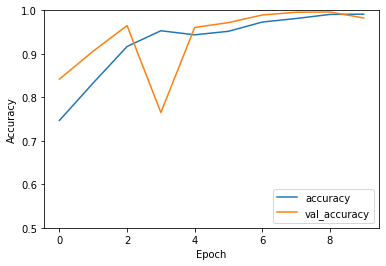

In [15]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

In [16]:
print(test_acc)

0.9825000166893005
